<a href="https://colab.research.google.com/github/farisazizy/data-visualization-assignment/blob/main/geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Farishadi Mufakkir Azizy | 1301194003

# Peta Persebaran Covid-19 per 1 Mei 2021 di Indonesia

Dataset diambil dari sumber berikut: https://news.detik.com/berita/d-5553860/update-lengkap-data-kasus-corona-di-ri-1-mei-2021

latitude dan longitudinal diambil dari sumber berikut: https://bnpb-inacovid19.hub.arcgis.com

Kedua data tersebut disatukan kemudian dijadikan satu file excel bernama *indo-region_longlat_covid1mei.xlsx*



In [ ]:
# Import pandas
import pandas as pd

# Membuka dataset ke dataframe
df = pd.read_excel("indo-region_longlat_covid1mei.xlsx")
df

,fid,kode_prov,nama_prov,positif,lat,long
0,1,11,Aceh,124,96.909523,4.225082
1,2,12,Sumatera Utara,59,99.057888,2.184779
2,3,13,Sumatera Barat,179,10.046681,-0.851914
3,4,14,Riau,377,10.181289,0.510526
4,5,15,Jambi,60,10.359932,-1.617750
5,6,16,Sumatera Selatan,147,104.170419,-3.213347
6,7,17,Bengkulu,102,102.263120,-3.791160
7,8,19,Bangka Belitung,66,105.986948,-2.252956
8,9,18,Lampung,200,105.018313,-4.918073
9,10,21,Kepulauan Riau,180,108.202229,3.915947


In [ ]:
# Import matplotlib untuk grafik

import matplotlib
import matplotlib.pyplot as plt

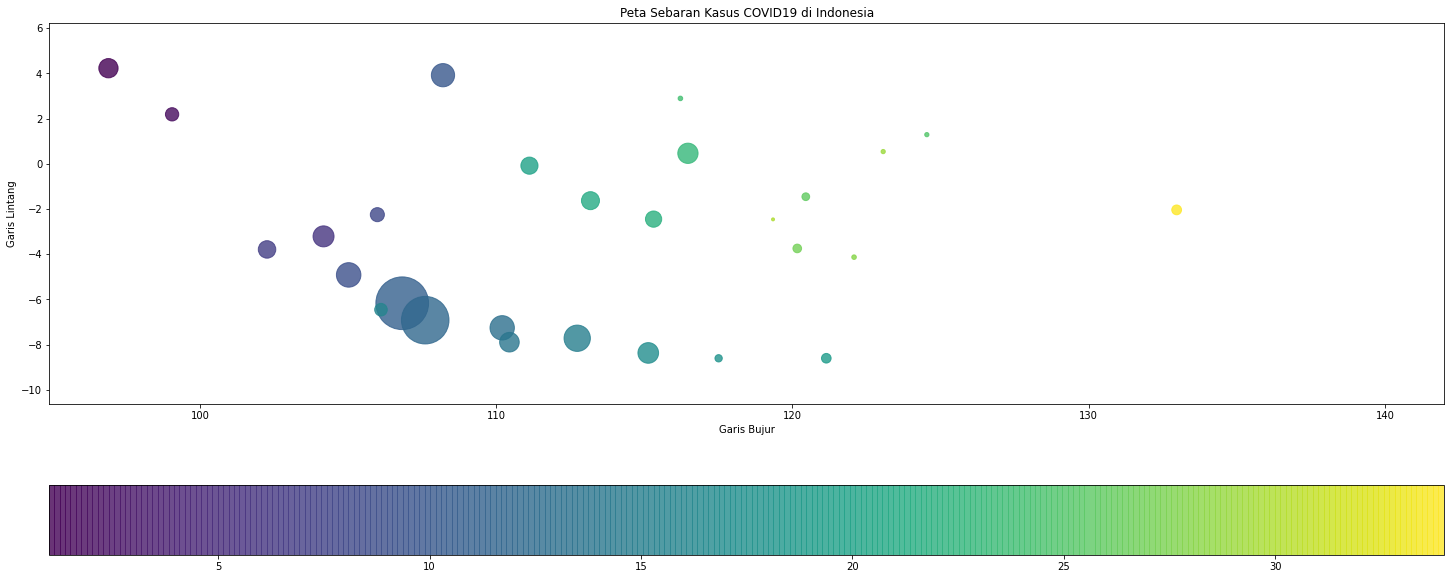

In [ ]:
# Membuat Grafik berdasarkan longitude dan latitude

x = df['lat']
y = df['long']
size = df['positif'] * 3
color = df['fid']

fig, ax = plt.subplots(figsize=(25,10))
sc = plt.scatter(x, y, s=size, c=color, alpha=.8)
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia per 1 Mei 2021')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+2])
plt.ylim([-8.606652084111358-2, 4.225081892093782+2])
plt.show()

Dapat dilihat bahwa bentuk scatter plot mengikuti pola pulau negara Indonesia. Selanjutnya kita akan menggunakan library geopandas untuk mengaplikasikan titik-titik tersebut ke peta negara Indonesia

In [ ]:
# install library geopandas
!pip install geopandas

     |████████████████████████████████| 1.0 MB 10.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.0 MB/s 
     |████████████████████████████████| 15.4 MB 42.9 MB/s 


In [ ]:
# Import geopandas
import geopandas as gpd

# Membaca file geografis negara Indonesia
map_df = gpd.read_file("Indonesia.shx") # file shx sudah disiapkan

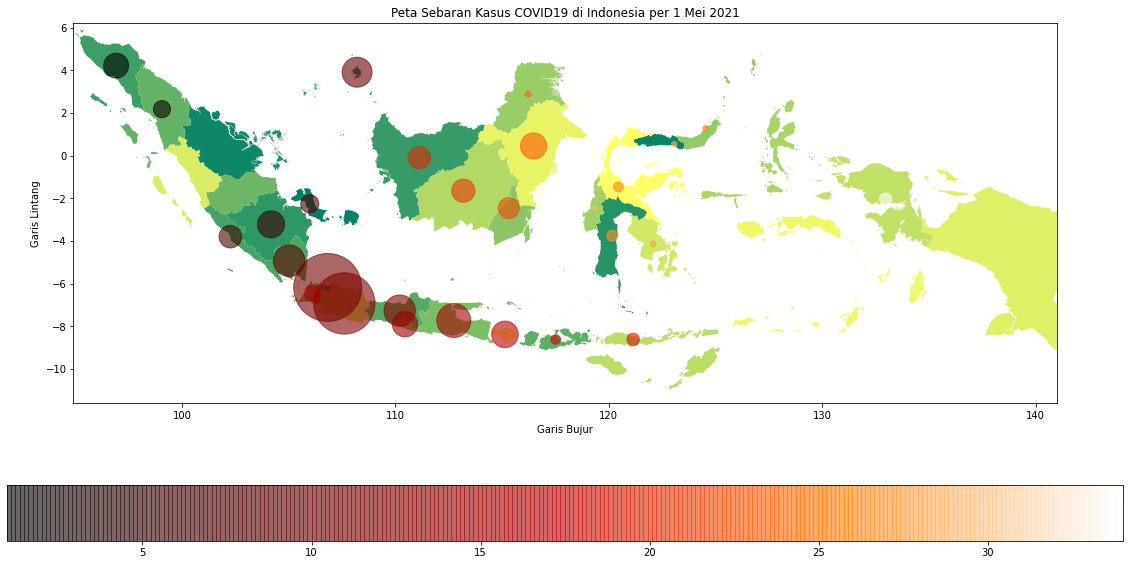

In [ ]:
# Membuat peta persebaran

kordinat = df[['lat', 'long']]
merged = map_df.join(kordinat)

x = df['lat']
y = df['long']
size = df['positif'] * 5
color = df['fid']

# fig, ax = plt.subplots(figsize=(25,10))
ax = map_df.plot(figsize=(20,10), cmap='summer')
sc = plt.scatter(x, y, s=size, c=color, alpha=.6, cmap='gist_heat')
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia per 1 Mei 2021')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+1])
plt.ylim([-8.606652084111358-3, 4.225081892093782+2])
plt.show()